In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print( X_train.shape, Y_train.shape )
print( X_test.shape, Y_test.shape )

from tensorflow.keras import utils
X_train = X_train[ 0:5000 ]
Y_train_con = Y_train[ 0:5000 ]
X_test = X_test[0:1000]
Y_test_con = Y_test[0:1000]

print( "#"*40 )
print( X_train.shape, Y_train_con.shape )
print( X_test.shape, Y_test_con.shape )

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
########################################
(5000, 32, 32, 3) (5000, 1)
(1000, 32, 32, 3) (1000, 1)


In [4]:
Y_train = utils.to_categorical(Y_train_con)
Y_test = utils.to_categorical(Y_test_con)
print( X_train.shape, Y_train.shape )
print( X_test.shape, Y_test.shape )

(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3) ) )
model.add( MaxPool2D(2, 2) )
model.add(Conv2D(32, (3, 3) , padding='same', activation='relu') )
model.add( MaxPool2D(2, 2) )
model.add(Conv2D(64, (3, 3), padding='same', activation='relu') )
model.add( MaxPool2D(2, 2) )
model.add(Conv2D(64, (3, 3), padding='same', activation='relu') )
model.add( MaxPool2D(2, 2) )
model.add( Flatten() )
model.add( Dense(128, activation='relu'))
model.add( Dense(10, activation='softmax'))

print( "Completed.")

Completed.


In [10]:
model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)         

In [12]:
history = model.fit( X_train, Y_train, batch_size=256, epochs=100, verbose=2,
                   validation_data=(X_test, Y_test))

Epoch 1/100
20/20 - 5s - loss: 10.6103 - accuracy: 0.1344 - val_loss: 2.5277 - val_accuracy: 0.1840
Epoch 2/100
20/20 - 5s - loss: 2.2775 - accuracy: 0.1986 - val_loss: 2.6895 - val_accuracy: 0.1280
Epoch 3/100
20/20 - 5s - loss: 2.2282 - accuracy: 0.2212 - val_loss: 2.2268 - val_accuracy: 0.1950
Epoch 4/100
20/20 - 5s - loss: 2.0915 - accuracy: 0.2586 - val_loss: 2.5736 - val_accuracy: 0.1590
Epoch 5/100
20/20 - 5s - loss: 2.1185 - accuracy: 0.2852 - val_loss: 1.8814 - val_accuracy: 0.3280
Epoch 6/100
20/20 - 5s - loss: 1.9440 - accuracy: 0.3024 - val_loss: 1.9958 - val_accuracy: 0.2890
Epoch 7/100
20/20 - 5s - loss: 1.8323 - accuracy: 0.3574 - val_loss: 1.9001 - val_accuracy: 0.3300
Epoch 8/100
20/20 - 5s - loss: 1.7070 - accuracy: 0.3960 - val_loss: 2.3063 - val_accuracy: 0.2550
Epoch 9/100
20/20 - 5s - loss: 1.6934 - accuracy: 0.4122 - val_loss: 1.7734 - val_accuracy: 0.3520
Epoch 10/100
20/20 - 5s - loss: 1.5552 - accuracy: 0.4498 - val_loss: 1.9207 - val_accuracy: 0.3630
Epoch 11

20/20 - 5s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.0242 - val_accuracy: 0.4740
Epoch 84/100
20/20 - 5s - loss: 0.3950 - accuracy: 0.9432 - val_loss: 3.3497 - val_accuracy: 0.4590
Epoch 85/100
20/20 - 5s - loss: 0.0553 - accuracy: 0.9844 - val_loss: 3.7688 - val_accuracy: 0.4750
Epoch 86/100
20/20 - 5s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.9677 - val_accuracy: 0.4760
Epoch 87/100
20/20 - 5s - loss: 7.4155e-04 - accuracy: 1.0000 - val_loss: 4.2068 - val_accuracy: 0.4790
Epoch 88/100
20/20 - 5s - loss: 3.8734e-04 - accuracy: 1.0000 - val_loss: 4.4397 - val_accuracy: 0.4730
Epoch 89/100
20/20 - 5s - loss: 0.4079 - accuracy: 0.9286 - val_loss: 3.6618 - val_accuracy: 0.4690
Epoch 90/100
20/20 - 5s - loss: 0.0309 - accuracy: 0.9930 - val_loss: 4.6406 - val_accuracy: 0.4290
Epoch 91/100
20/20 - 5s - loss: 0.1914 - accuracy: 0.9506 - val_loss: 3.8727 - val_accuracy: 0.4750
Epoch 92/100
20/20 - 5s - loss: 0.0490 - accuracy: 0.9912 - val_loss: 6.2101 - val_accuracy: 0.3700
Epoch

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

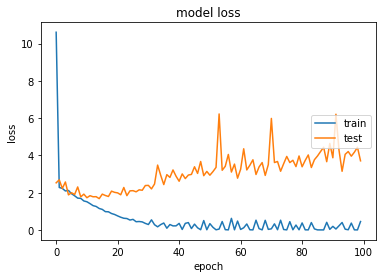

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title( 'model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

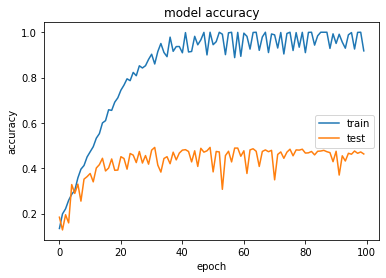

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title( 'model accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix( model_input , feature, label, class_info ) :
    pred = model_input.predict ( feature )
    cnf_matrix = confusion_matrix( np.argmax(label, axis=1), np.argmax(pred,axis=1))
    plt.figure()
    plt.imshow( cnf_matrix , interpolation='nearest', cmap=plt.cm.Blues )
    tick_marks = np.arange( len(class_info) )
    plt.xticks( tick_marks, class_info, rotation=45)
    plt.yticks( tick_marks, class_info )
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product( range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1]) ) :
        plt.text( j, i, cnf_matrix[i, j], horizontalalignment="center", 
                 color="white" if cnf_matrix[i, j] > thresh else "black" )
    plt.tight_layout()
    plt.ylabel( "True label" )
    plt.xlabel( "Predicted label" )
    plt.show()

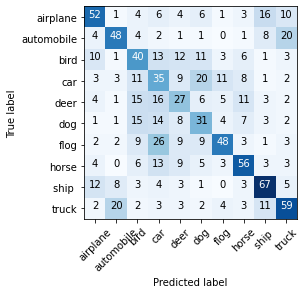

In [25]:
class_info = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'flog', 'horse','ship ', 'truck' ]
plot_confusion_matrix(model, X_test , Y_test , class_info=class_info)